In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from collections import Counter
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import folium
from matplotlib.colors import LinearSegmentedColormap
import missingno as msno

2 Exploratory Data Analysis

This dataset contains 515,738 customer reviews and scoring of 1493 Luxury Hotels across Europe. The csv file contains 17 fields. The description of each field is as below:



In [ ]:
#loading the dataset from the Hotel_reviews dataset
df = pd.read_csv("Hotel_Reviews.csv")

In [ ]:
#printing the columns names of the datset
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [ ]:
#printing the shape of the dataset
df.shape

(183145, 17)

In [ ]:
print ('Number of data points : ', df.shape[0], \
       '\nNumber of features:', df.shape[1])
df.head()

Number of data points :  183145 
Number of features: 17


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


2.2 Data Cleaning

In [ ]:
#Removing duplicates from the dataset
print(sum(df.duplicated()))
df = df.drop_duplicates()
print('After removing Duplicates: {}'.format(df.shape))

380
After removing Duplicates: (182765, 17)


Checking for the missing values in the dataset.

<Axes: >

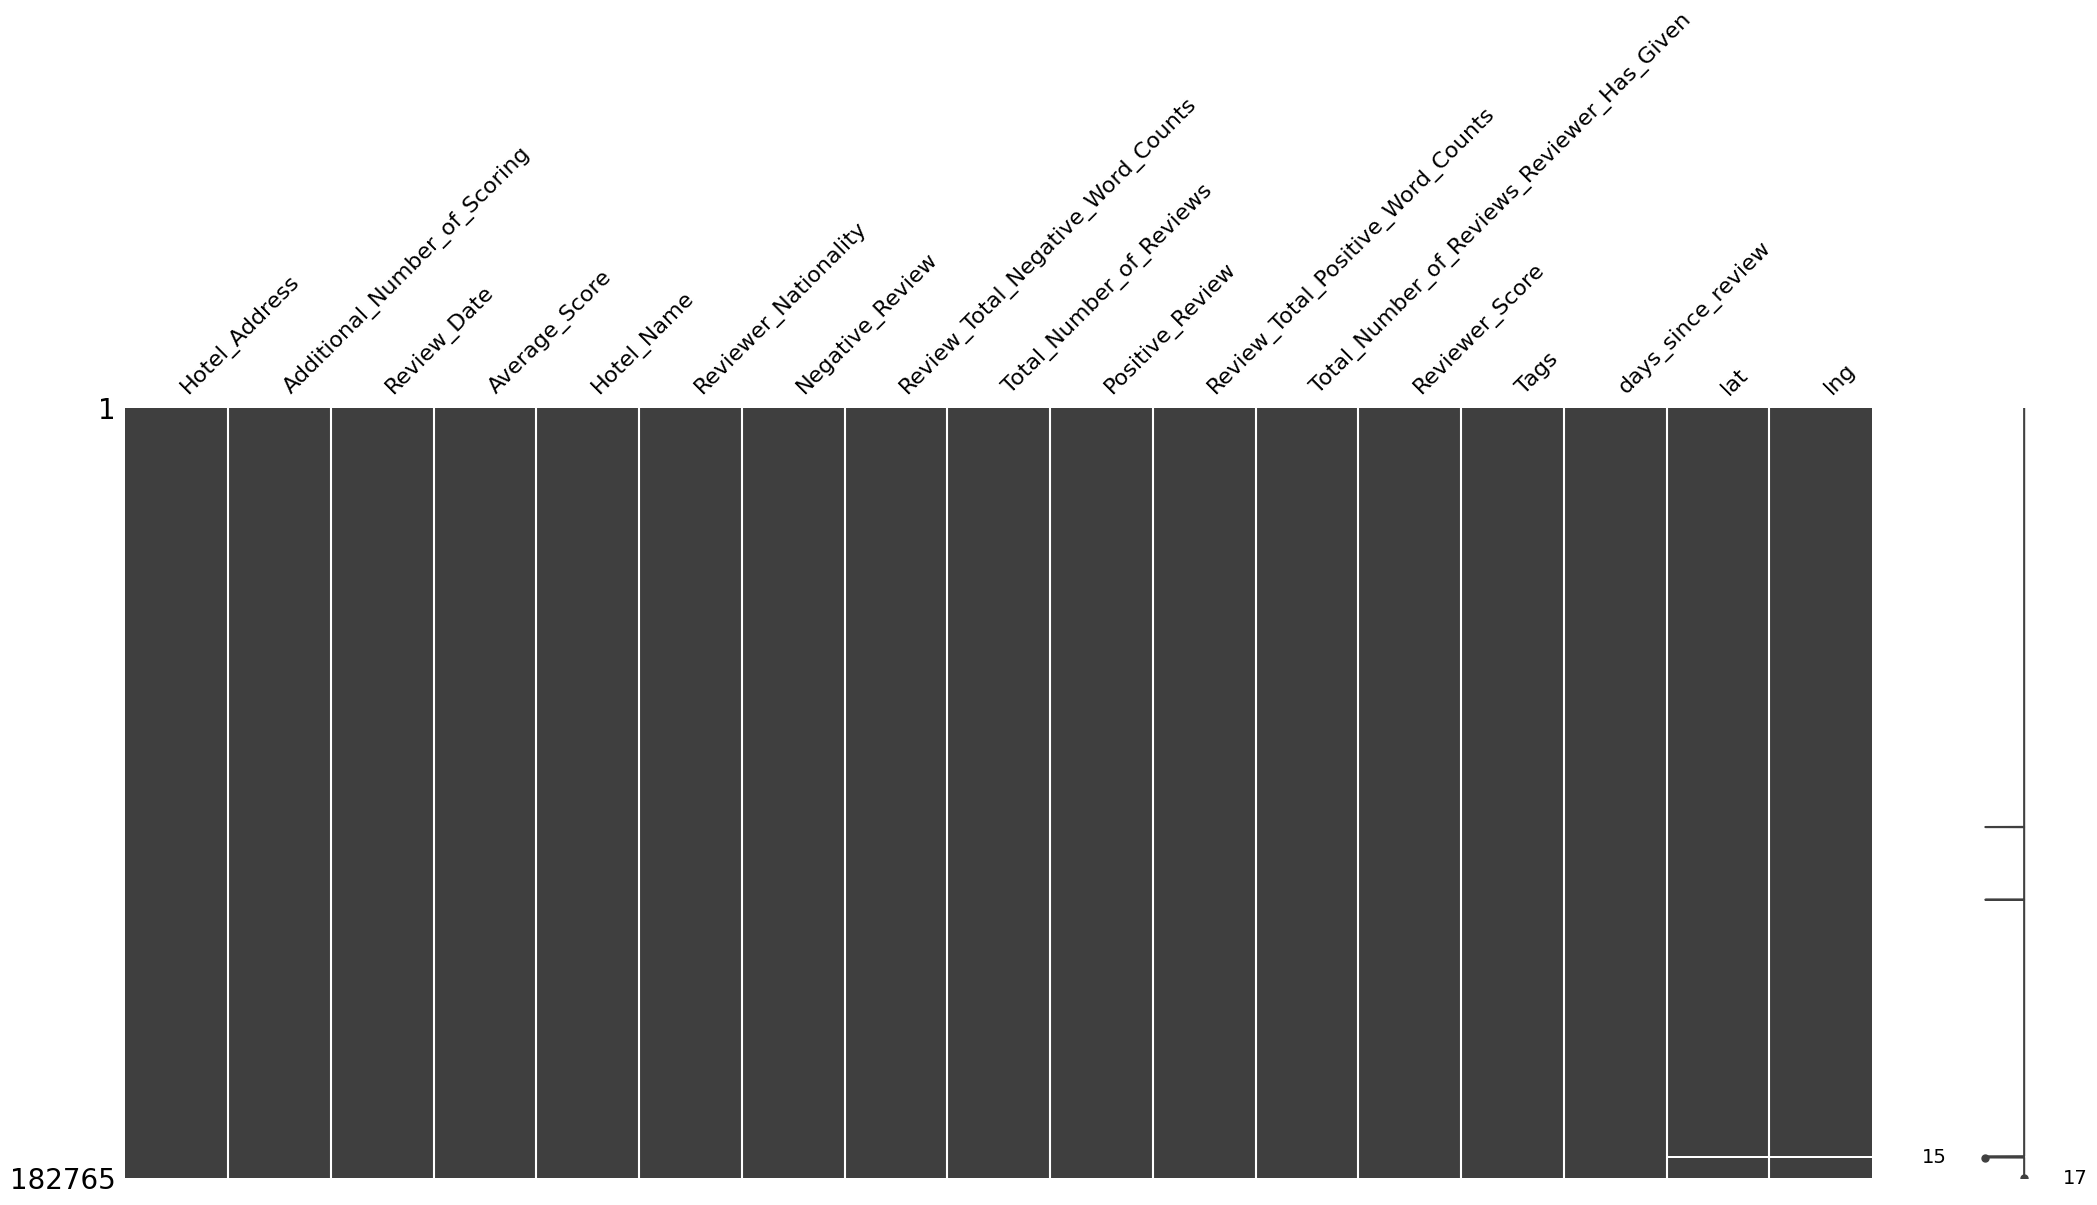

In [ ]:
msno.matrix(df)

In [ ]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)
nans_df = nans_df[['Hotel_Name','lat','lng']]
print('No of missing values in the dataset: {}'.format(len(nans_df)))

No of missing values in the dataset: 382


In [ ]:
nans_df.Hotel_Name.describe()

count                                        382
unique                                         3
top       Maison Albar Hotel Paris Op ra Diamond
freq                                         290
Name: Hotel_Name, dtype: object

In [ ]:
# let's look at the reviews frequency of the missing Hotels.
nans_df.Hotel_Name.value_counts()

Maison Albar Hotel Paris Op ra Diamond    290
Holiday Inn Paris Montmartre               55
Mercure Paris Gare Montparnasse            37
Name: Hotel_Name, dtype: int64

Instead of removing the Nan values from the dataset, Try to fill the Nan values with the similar Hotel_Addresses lat, lng values in the dataset. If the Hotel_Address is matched with the other rows(i.e Nan valued rows) in the dataset, Fill the Nan values in the dataset with the matched values(i.e., lat,lng).

In [ ]:
print('No of reviews in the dataset to that Hotel:')
print('Fleming s Selection Hotel Wien City: {}'.format(len(df.loc[df.Hotel_Name == 'Fleming s Selection Hotel Wien City'])))
print('Hotel City Central: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel City Central'])))
print('Hotel Atlanta: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Atlanta'])))
print('Maison Albar Hotel Paris Op ra Diamond: {}'.format(len(df.loc[df.Hotel_Name == 'Maison Albar Hotel Paris Op ra Diamond'])))
print('Hotel Daniel Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Daniel Vienna'])))
print('Hotel Pension Baron am Schottentor: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Pension Baron am Schottentor'])))
print('Austria Trend Hotel Schloss Wilhelminenberg Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien'])))
print('Derag Livinghotel Kaiser Franz Joseph Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Derag Livinghotel Kaiser Franz Joseph Vienna'])))
print('NH Collection Barcelona Podium: {}'.format(len(df.loc[df.Hotel_Name == 'NH Collection Barcelona Podium'])))
print('City Hotel Deutschmeister: {}'.format(len(df.loc[df.Hotel_Name == 'City Hotel Deutschmeister'])))
print('Hotel Park Villa: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Park Villa'])))
print('Cordial Theaterhotel Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Cordial Theaterhotel Wien'])))
print('Holiday Inn Paris Montmartre: {}'.format(len(df.loc[df.Hotel_Name == 'Holiday Inn Paris Montmartre'])))
print('Roomz Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Roomz Vienna'])))
print('Mercure Paris Gare Montparnasse: {}'.format(len(df.loc[df.Hotel_Name == 'Mercure Paris Gare Montparnasse'])))
print('Renaissance Barcelona Hotel: {}'.format(len(df.loc[df.Hotel_Name == 'Renaissance Barcelona Hotel'])))
print('Hotel Advance: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Advance'])))

No of reviews in the dataset to that Hotel:
Fleming s Selection Hotel Wien City: 0
Hotel City Central: 0
Hotel Atlanta: 0
Maison Albar Hotel Paris Op ra Diamond: 290
Hotel Daniel Vienna: 0
Hotel Pension Baron am Schottentor: 0
Austria Trend Hotel Schloss Wilhelminenberg Wien: 0
Derag Livinghotel Kaiser Franz Joseph Vienna: 0
NH Collection Barcelona Podium: 0
City Hotel Deutschmeister: 0
Hotel Park Villa: 0
Cordial Theaterhotel Wien: 0
Holiday Inn Paris Montmartre: 55
Roomz Vienna: 0
Mercure Paris Gare Montparnasse: 37
Renaissance Barcelona Hotel: 0
Hotel Advance: 0


From the above figures we see that the missing values and available values in the dataset are same.(i.e the inflat,lng values are not available in the entire dataset).

So, Now we can fill the NaN values in the dataset manually. (Simply we can ignore those rows in the dataset by removing them. But i decided not to delete the information and fill the lat,lng values manually just because when it comes to Business problem if i try to remove the data i am losing information of 17 Hotel's. It seems like losing our 17 clients.)



In [ ]:
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
      'NH Collection Barcelona Podium':41.3916,
      'City Hotel Deutschmeister':48.22088,
      'Hotel Park Villa':48.233577,
      'Cordial Theaterhotel Wien':48.209488,
      'Holiday Inn Paris Montmartre':48.888920,
      'Roomz Vienna':48.186605,
      'Mercure Paris Gare Montparnasse':48.840012,
      'Renaissance Barcelona Hotel':41.392673,
      'Hotel Advance':41.383308}


In [ ]:
#longitude information of Hotels
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
      'NH Collection Barcelona Podium':2.1779,
      'City Hotel Deutschmeister':16.36663,
      'Hotel Park Villa':16.345682,
      'Cordial Theaterhotel Wien':16.351585,
      'Holiday Inn Paris Montmartre':2.333087,
      'Roomz Vienna':16.420643,
      'Mercure Paris Gare Montparnasse':2.323595,
      'Renaissance Barcelona Hotel':2.167494,
      'Hotel Advance':2.162828}

In [ ]:
#filling the latitude information
df['lat'] = df['lat'].fillna(df['Hotel_Name'].apply(lambda x: loc_lat.get(x)))
#filling longitude information
df['lng'] = df['lng'].fillna(df['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

<Axes: >

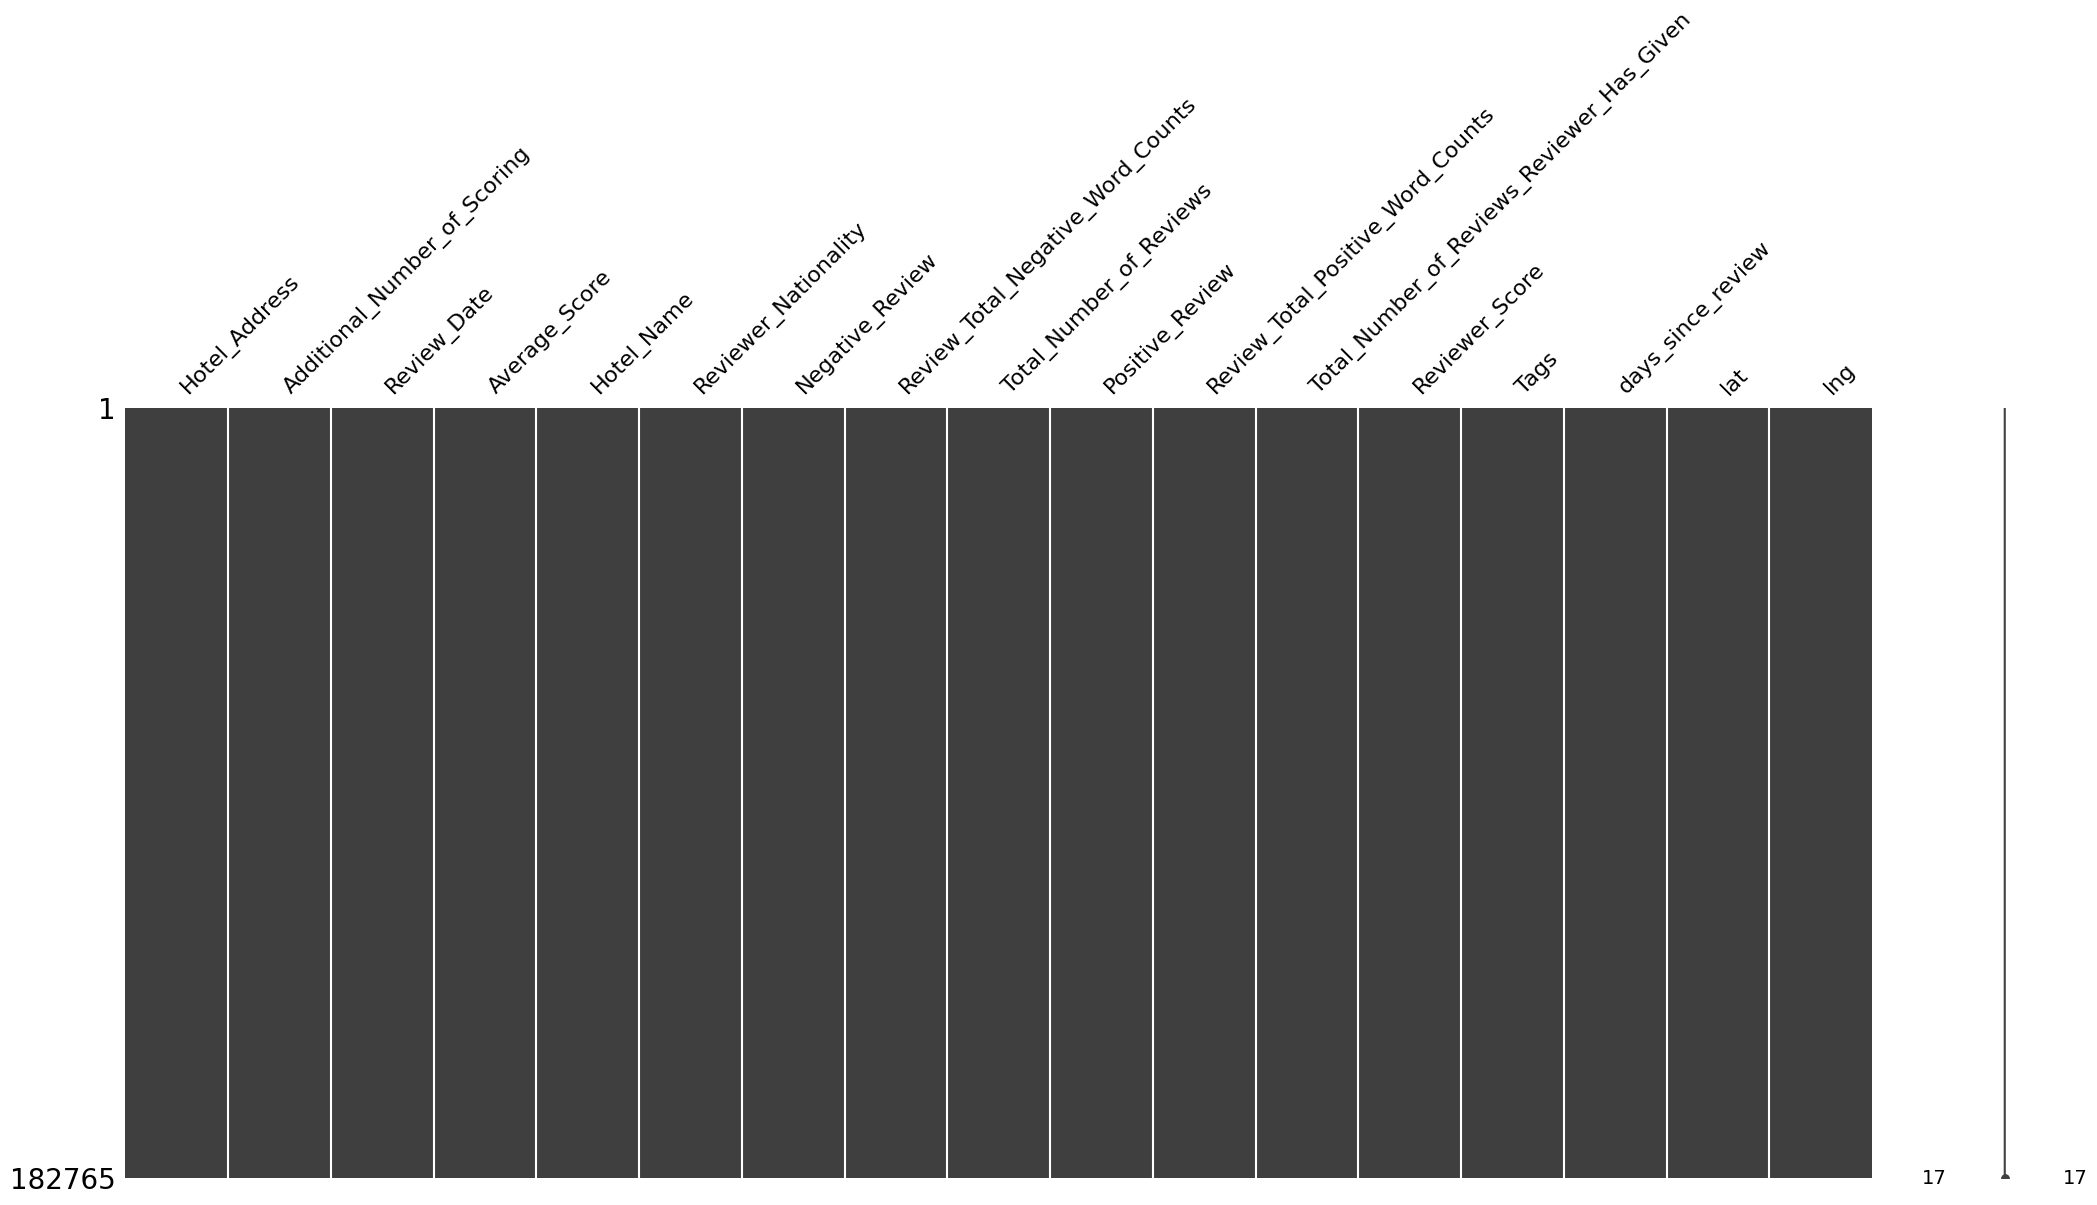

In [ ]:
#looking whether information is correctly filled or not.
msno.matrix(df)

In [ ]:
#saving the data to pickle files
df.to_pickle('After_filling_Nans')

In [ ]:
#loading the data from the pickle file
df = pd.read_pickle('After_filling_Nans')
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time The room 023 i got was just as i wanted to peaceful internal garden view big window We were tired from waiting the room so we placed our belongings and rushed to the city In the evening it turned out that there was a constant noise in the room i guess it was made by vibrating vent tubes or something it was constant and annoying as hell AND it did not stop even at 2 am making it hard to fall asleep for me and my wife I have an audio recording that i can not attach here but if you want i can send it via e mail The next day the technician came but was not able to determine the cause of the disturbing sound so i was offered to change the room once again the hotel was fully booked and they had only 1 room left the one that was smaller but seems newer,397,1403,Only the park outside of the hotel was beautiful,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficult as most rooms are two story with narrow steps So ask for single level Inside the rooms are very very basic just tea coffee and boiler and no bar empty fridge,42,1403,Location was good and staff were ok It is cute hotel the breakfast range is nice Will go back,21,9,7.1,"[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to w

Basic stats for the feature: Hotel_Name

In [ ]:
df.Hotel_Name.describe()

count                                         182765
unique                                           529
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

There are 1492 Hotel Names and the most reviewed Hotel is Britannia International Hotel Canary Wharf with 4789 reviews.

<Axes: >

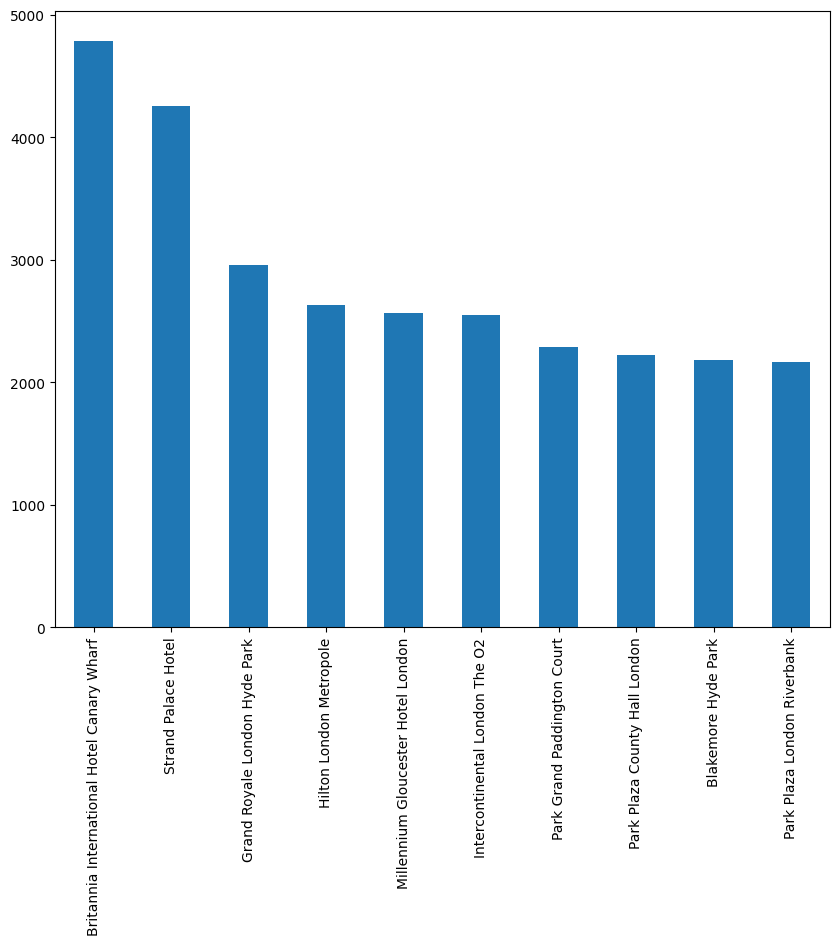

In [ ]:
# Let's look at the top 10 reviewed Hotels
Hotel_Name_count = df.Hotel_Name.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(10,8))

Basic stats for the feature: Average_Score ¶

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50, 18
rcParams["axes.labelsize"] = 16
from matplotlib import pyplot
import seaborn as sns

<Axes: xlabel='Average_Score', ylabel='count'>

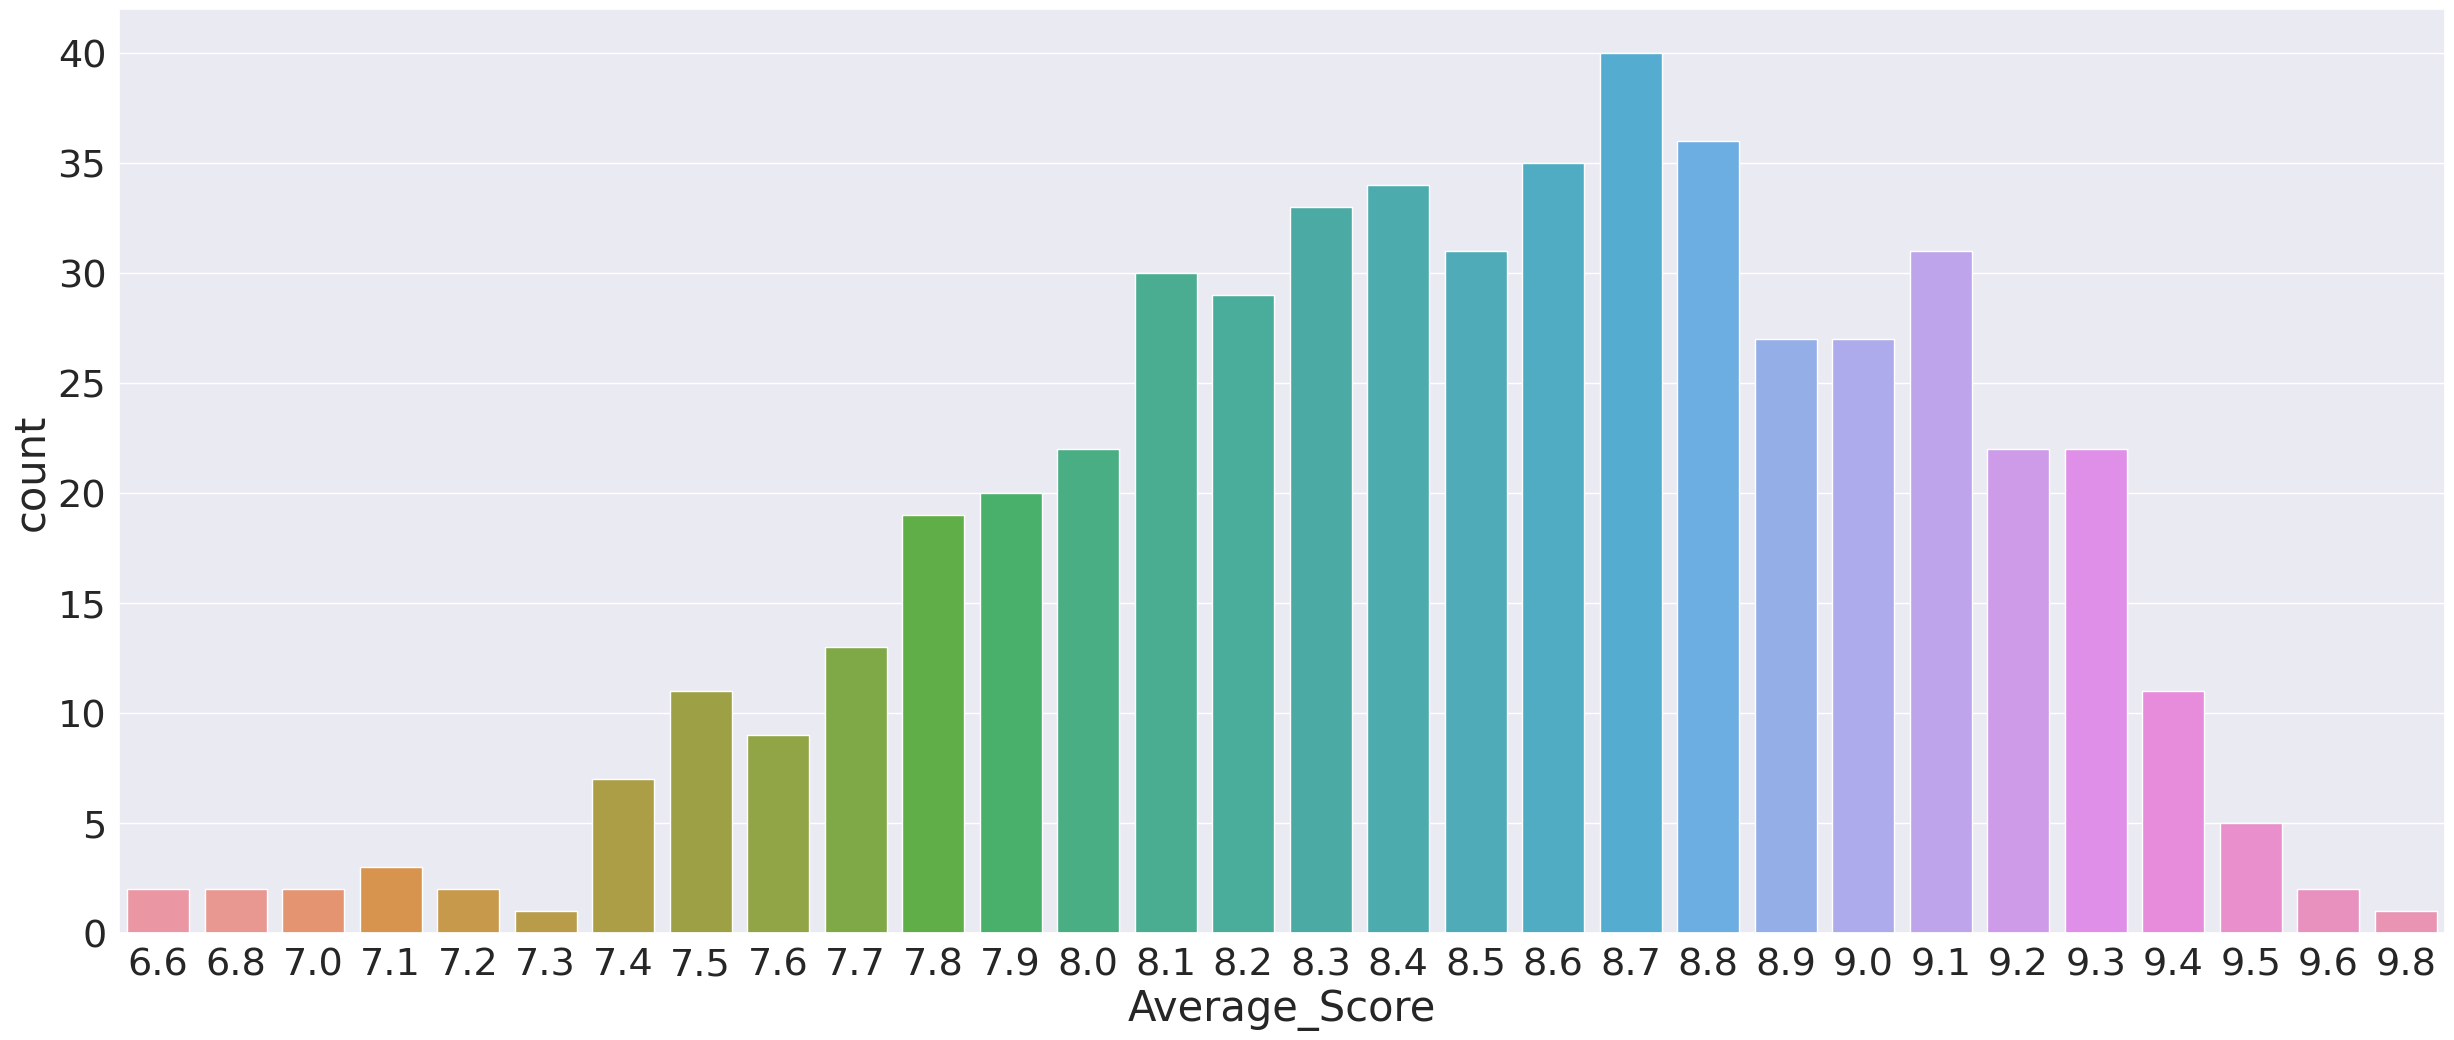

In [ ]:
data_plot = df[["Hotel_Name","Average_Score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=data_plot)

we see that most of the Hotels average_score lie in the range of 8.0 and 9.1 range

Basic stats for the feature: Review_Nationality

In [ ]:
text = ""
for i in range(df.shape[0]):
    text = " ".join([text,df["Reviewer_Nationality"].values[i]])

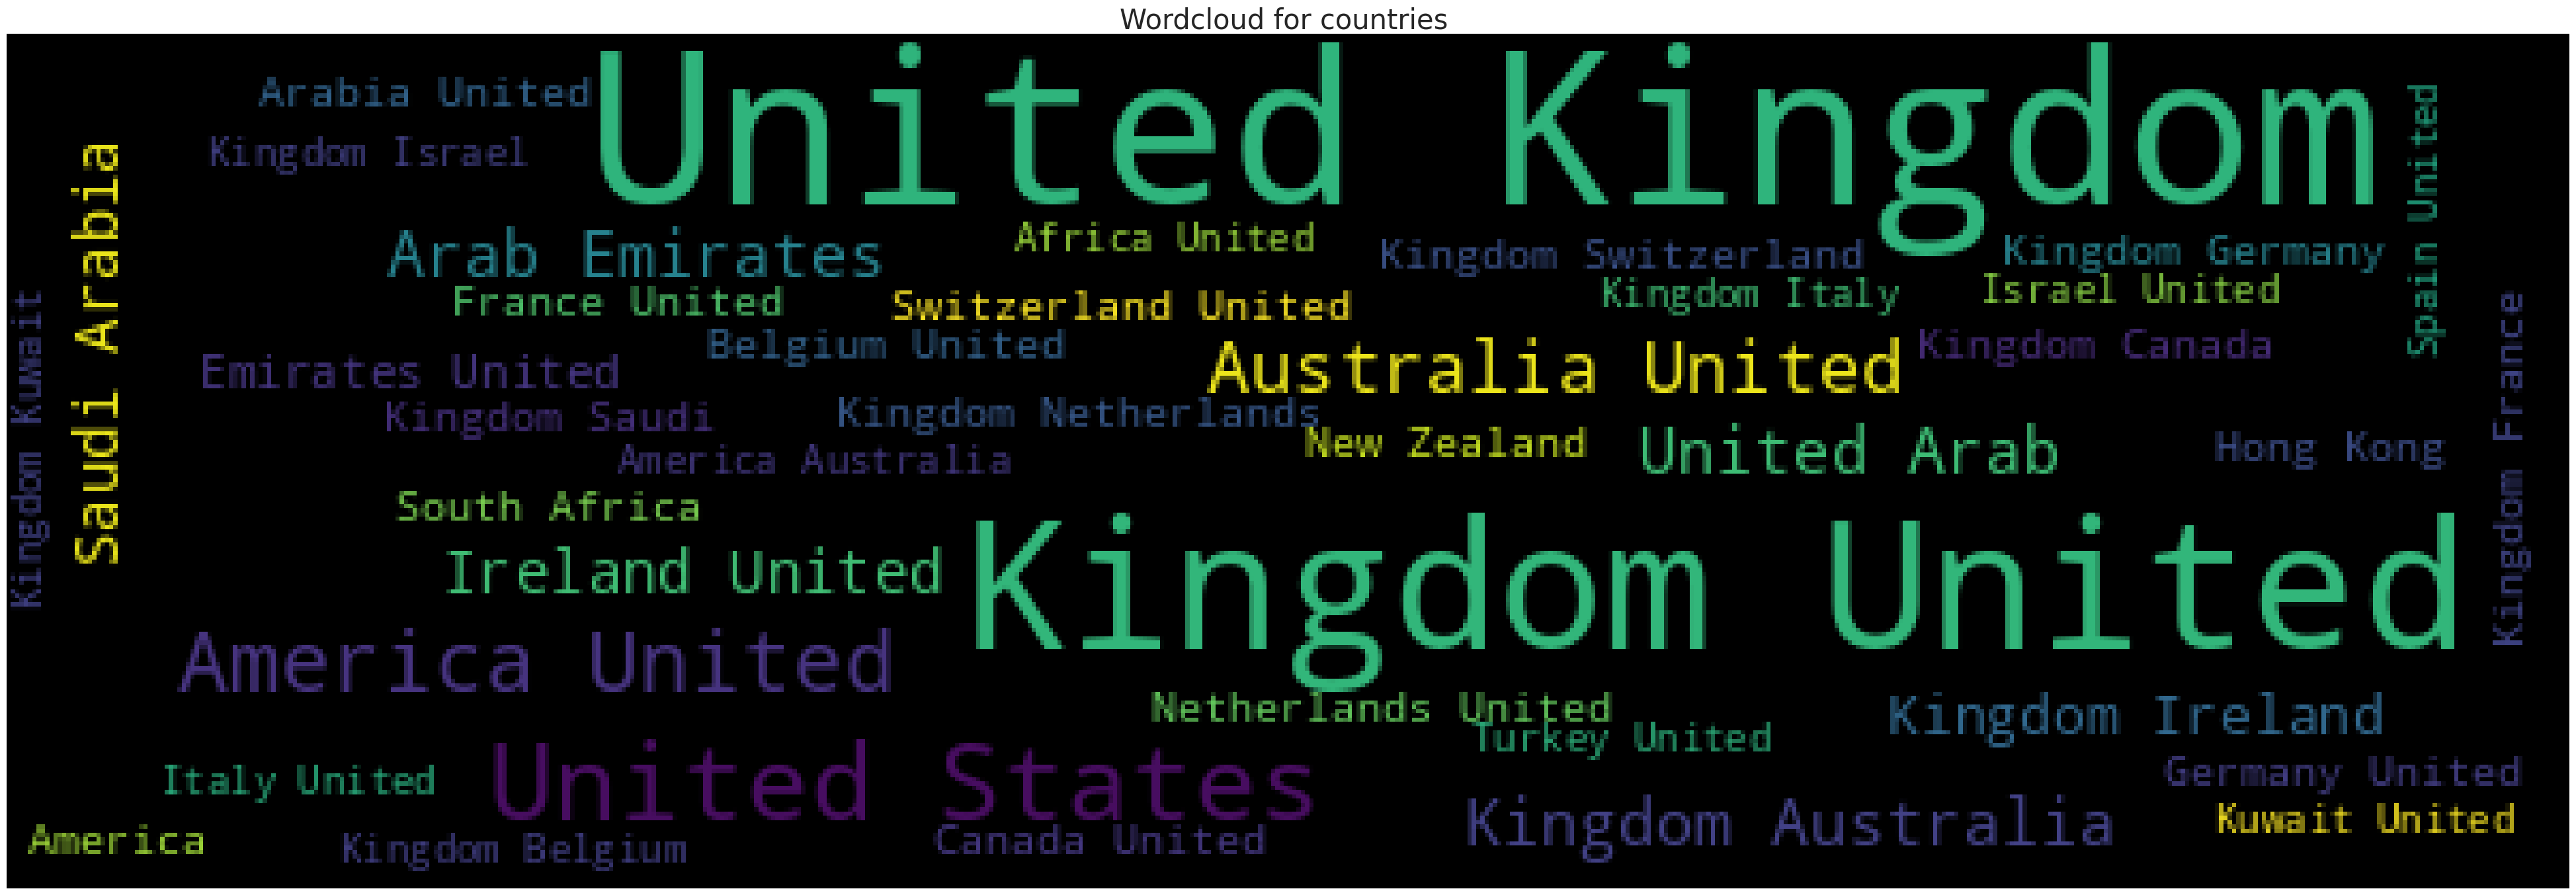

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black', width = 600,\
                      height=200, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=312)
plt.imshow(wordcloud)
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

In [ ]:
df.Reviewer_Nationality.describe()

count               182765
unique                 206
top        United Kingdom 
freq                100922
Name: Reviewer_Nationality, dtype: object

In [ ]:
# Let's look at the Top 10 Reviewer's Nationalities
Reviewer_Nat_Count = df.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

 United Kingdom               100922
 United States of America      11683
 Australia                      7810
 Ireland                        4665
 United Arab Emirates           3272
 Saudi Arabia                   3006
 France                         2630
 Switzerland                    2552
 Canada                         2546
 Netherlands                    2524
Name: Reviewer_Nationality, dtype: int64


The Reviewers belongs to 227 different countries and almost 47.57%(245110/515212) of Reviewers are from United Kingdom

**Basic stats for the feature: Review_Date**

In [ ]:
df.Review_Date.describe()

count       182765
unique         731
top       8/2/2017
freq          1192
Name: Review_Date, dtype: object

There Reviews are given on 731 dates and the most Reviews are given on 8/2/2017

<Axes: >

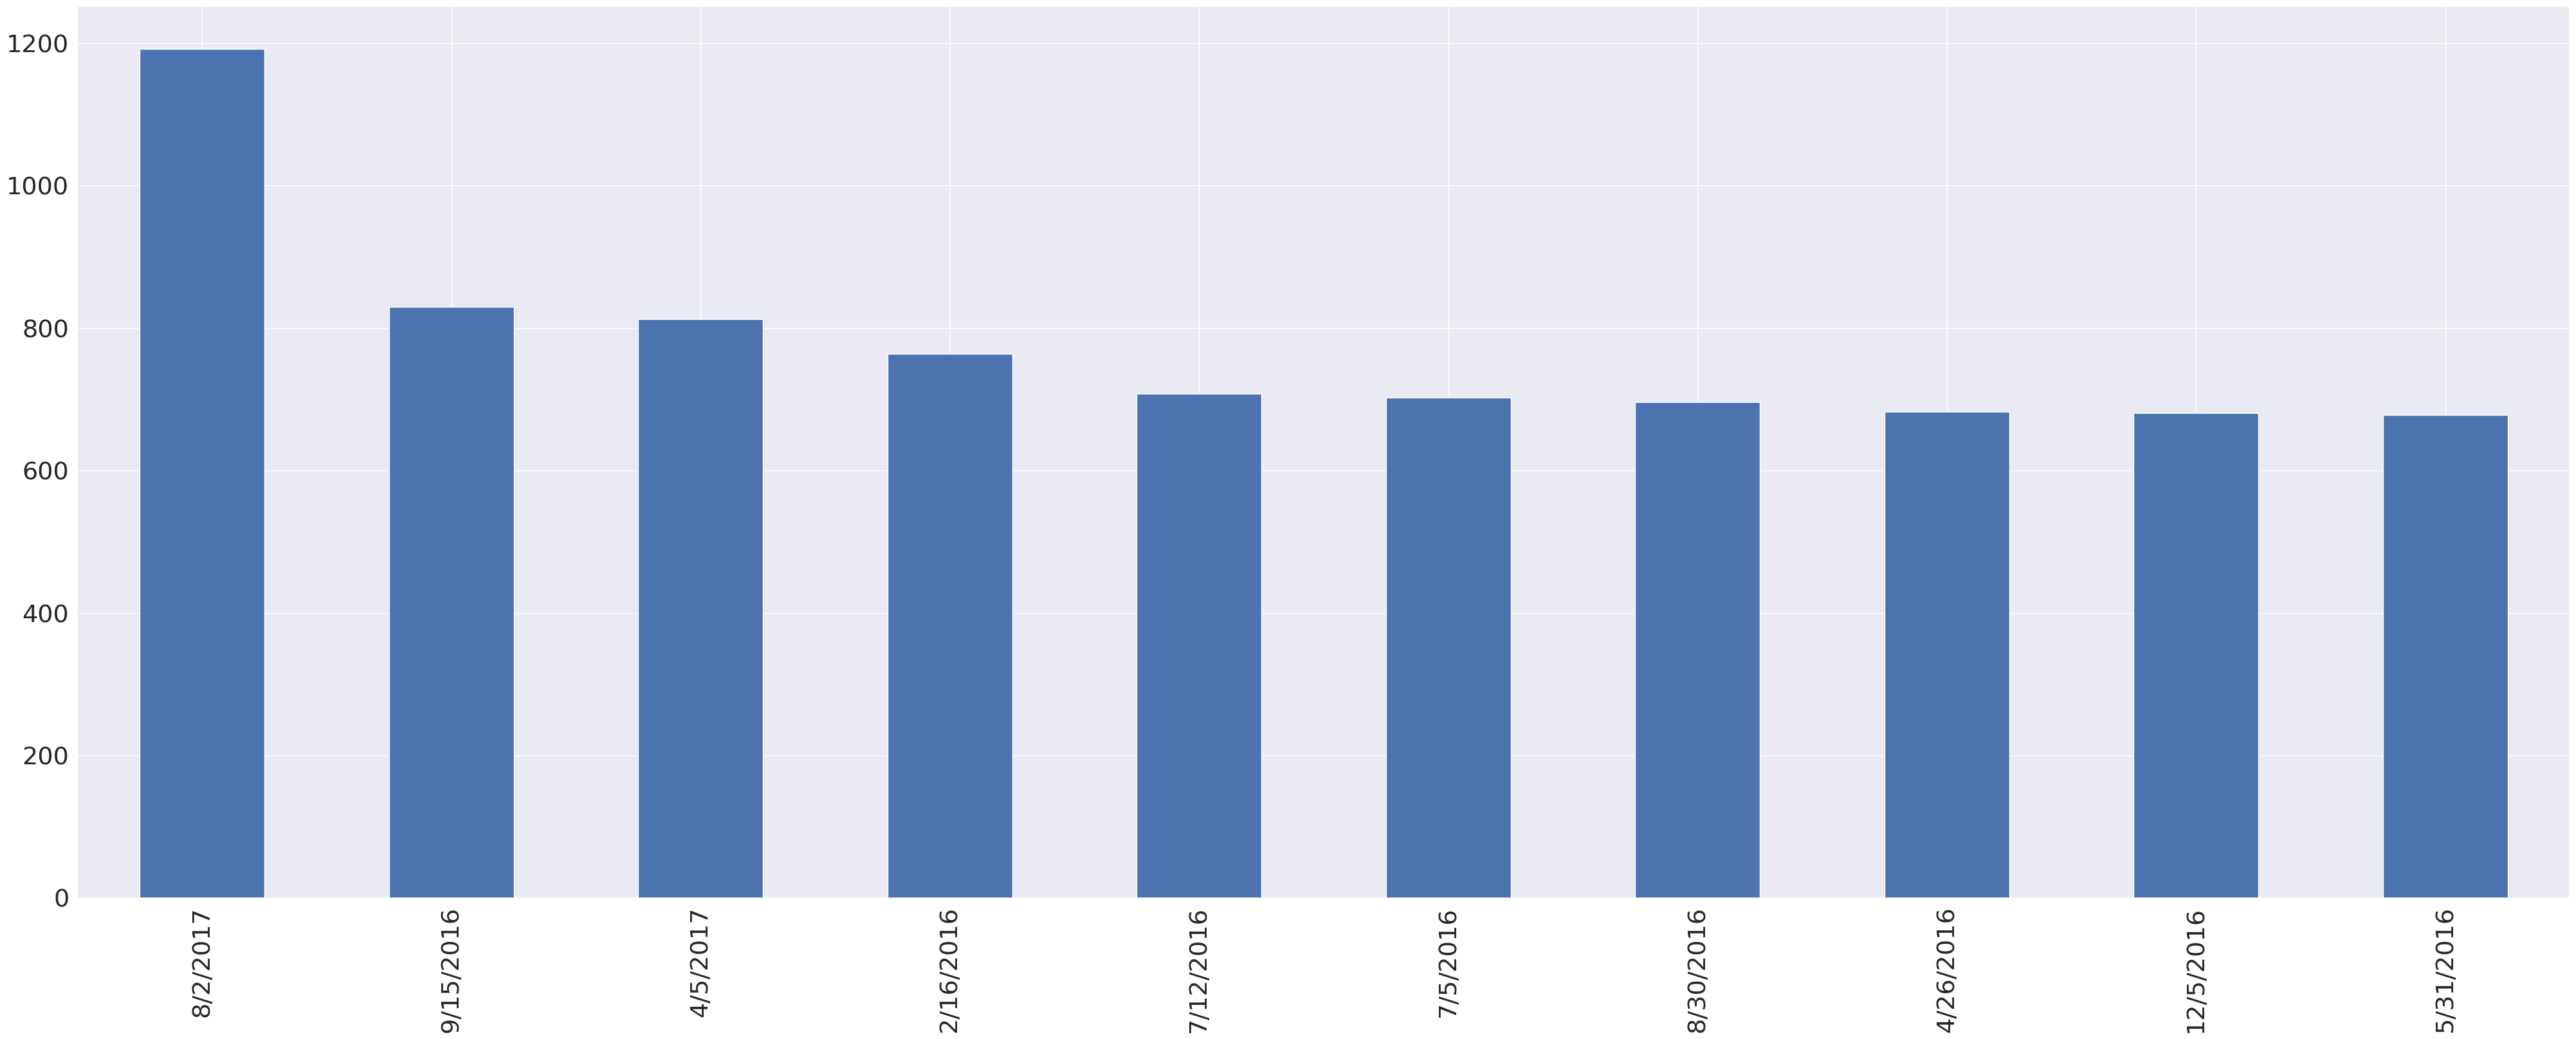

In [ ]:
# Let's look at the top 10 Reviews given dates
Review_Date_count = df.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

Basic stats for the feature: Total_Number_of_Reviews_Reviewer_Has_Given 

<Axes: >

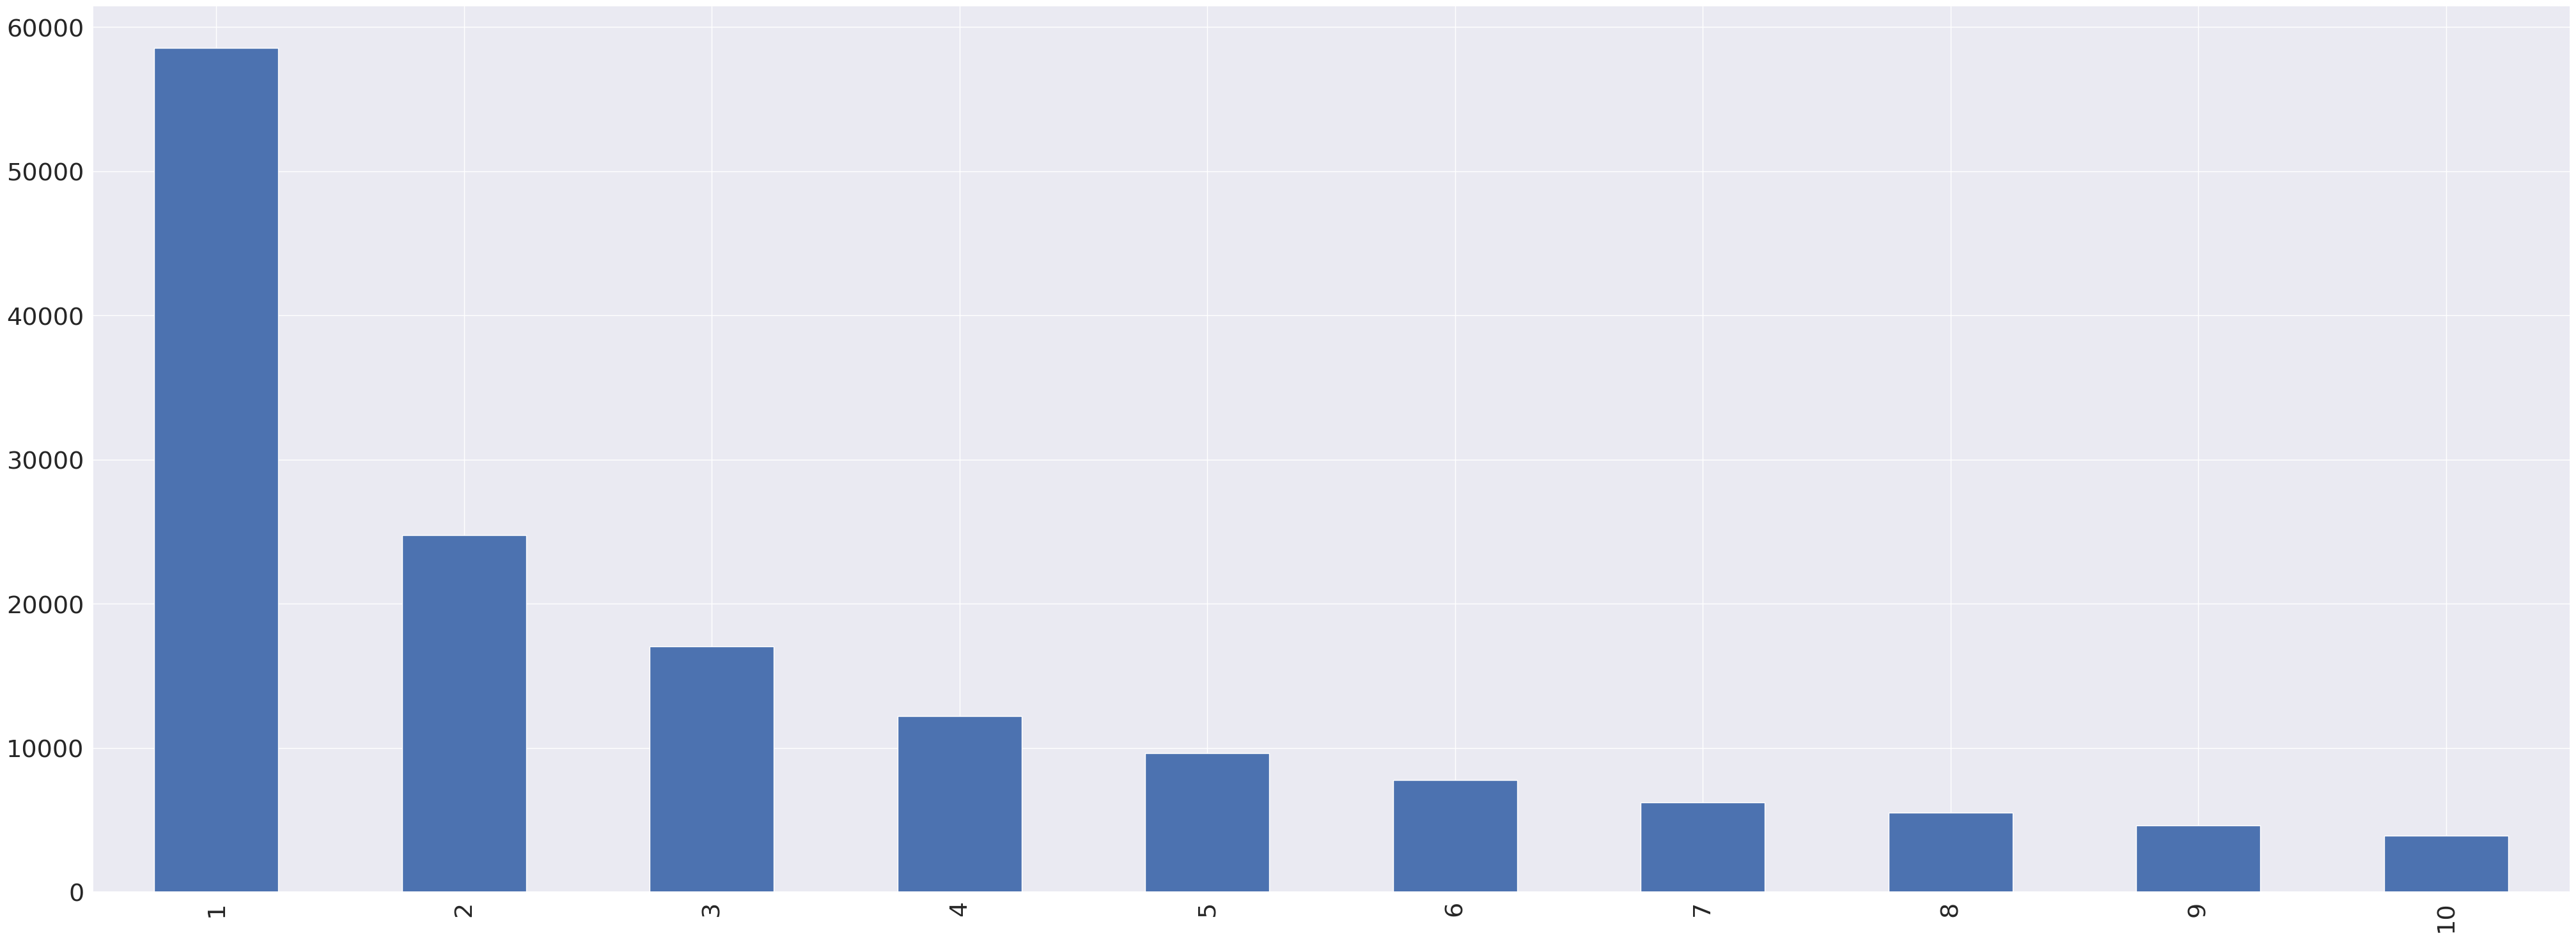

In [ ]:
Reviewers_freq = df.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()
Reviewers_freq[:10].plot(kind='bar')

In [ ]:
Reviewers_freq[:10]

1     58546
2     24744
3     17058
4     12203
5      9644
6      7784
7      6217
8      5518
9      4614
10     3893
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: int64

We see that almost 29.99% (154506 / 515212) of user's reviewed for the first_time.

Basic stats for the feature: Review_Total_Positive_Word_Counts 

In [ ]:
pos_words = df.Review_Total_Positive_Word_Counts.value_counts()
pos_words[:10]

we see that 0 words are more in number it means they are completely Negative reviews. Lets have a look at them.

In [ ]:
a = df.loc[df.Review_Total_Positive_Word_Counts == 0]
print('No of completely Negative reviews in the dataset:',len(a))
b = a[['Positive_Review','Negative_Review']]
b[:10]

No of completely Negative reviews in the dataset: 13145


,Positive_Review,Negative_Review
8,No Positive,Even though the pictures show very clean room...
32,No Positive,Our bathroom had an urine order Shower was ve...
98,No Positive,Got charged 50 for a birthday package when it...
121,No Positive,The first room had steep steps to a loft bed ...
134,No Positive,Foyer was a mess Only place to relax was the ...
146,No Positive,We booked a 3 night stay in a suite On arriva...
169,No Positive,Nothing One Of The Receptionist she did a rac...
172,No Positive,Hotel under sonstruction which we weren t awa...
202,No Positive,Renovation around the hotel sometimes can sta...
209,No Positive,Not given the room type we had booked and pre...


Basic stats for the feature: Review_Total_Negative_Word_Counts 

In [ ]:
neg_words = df.Review_Total_Negative_Word_Counts.value_counts()
neg_words[:10]

0     43846
2      8540
3      6592
6      6327
5      6150
7      5765
4      5433
8      5245
9      4838
10     4477
Name: Review_Total_Negative_Word_Counts, dtype: int64

In [ ]:
a = df.loc[df.Review_Total_Negative_Word_Counts == 0 ]
print('No of completely positive reviews in the dataset:',len(a))
b = a[['Positive_Review','Negative_Review']]
b[:10]

No of completely positive reviews in the dataset: 43846


,Positive_Review,Negative_Review
1,No real complaints the hotel was great great ...,No Negative
13,This hotel is being renovated with great care...,No Negative
15,This hotel is awesome I took it sincirely bec...,No Negative
18,Public areas are lovely and the room was nice...,No Negative
48,The quality of the hotel was brilliant and ev...,No Negative
53,Beautiful setting in a lovely park room very ...,No Negative
55,The hotel is lovely and the staff were amazin...,No Negative
59,Basically everything The style of the hotel i...,No Negative
75,The whole hotel was very clean the staff were...,No Negative
78,Hotel was really nice staff were very friendl...,No Negative


**Calculating no of positve and negative reviews**

In [ ]:
# For classifying positive and negative reviews
df['pos_count']=0
df['neg_count']=0

In [ ]:
# since we found the words are in mixed case letters and with trailing whitespace 
#we remove those white spaces and converting the reviews to lowercases
df['Negative_Review']=[x.lower().strip() for x in df['Negative_Review']]
df['Positive_Review']=[x.lower().strip() for x in df['Positive_Review']]

In [ ]:
#if the Positive_Review contains the words 'no positive' and 'nothing' are considered as a Negative_Review.
# if the Negative_Review contains the word 'everything' it is also considered as Negative_Review.
# we are maiking those reveiews as 1 in neg_count(attribute).
df["neg_count"] = df.apply(lambda x: 1 if x["Positive_Review"] == 'no positive' or \
                           x['Positive_Review']=='nothing' or \
                           x['Negative_Review']=='everything' \
                           else x['pos_count'],axis = 1)

In [ ]:
#if the Negative_Review contains the words 'no negative' and 'nothing' are considered as a Positive_Review.
#if the Positive_Review contains the word 'Everything' it is also considered as positive_Review. 
#we are making those reviews as 1 in the pos_count(attribute). 
df["pos_count"] = df.apply(lambda x: 1 if x["Negative_Review"] == 'no negative' or \
                           x['Negative_Review']=='nothing' or \
                           x['Positive_Review']=='everything' \
                           else x['pos_count'],axis = 1)

In [ ]:
#seeing how many reviews are classified as positive one's
df.pos_count.value_counts()

0    131044
1     51721
Name: pos_count, dtype: int64

In [ ]:
#seeing how many reviews are classified as negative one's
df.neg_count.value_counts()

0    168860
1     13905
Name: neg_count, dtype: int64

By adding those words we classified (1,49,981 + 37,854) i.e., 1,87,835 reviews.

In [ ]:
# Calculating no of positive and negative reviews for each Hotel and storing them into reviews dataset. 
reviews = pd.DataFrame(df.groupby(["Hotel_Name"])["pos_count","neg_count"].sum())

<ipython-input-41-b0cbee7ebc92>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reviews = pd.DataFrame(df.groupby(["Hotel_Name"])["pos_count","neg_count"].sum())


In [ ]:
reviews.head()

,pos_count,neg_count
Hotel_Name,,
11 Cadogan Gardens,55,10
1K Hotel,26,12
Acad mie H tel Saint Germain,89,7
Ace Hotel London Shoreditch,163,25
Amarante Champs Elys es,18,10


In [ ]:
# Adding index to the reviews dataframe
reviews["HoteL_Name"] = reviews.index
reviews.index = range(reviews.shape[0])
reviews.head()

In [ ]:
#calculating total number of reviews for each hotel
reviews["total"] = reviews["pos_count"] + reviews["neg_count"]
#calculating the positive ratio for each Hotel.
reviews["pos_ratio"] = reviews["pos_count"].astype("float")/reviews["total"].astype("float")

**Finding the top 20 famous Hotels**

In [ ]:
#looking at the famous 20 hotels location in the map. Famous Hotels are calculated based on the total
#no of reviews the Hotel has.
famous_hotels = reviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
popular = famous_hotels["HoteL_Name"].values[:20]
popular_hotels =df.loc[df['Hotel_Name'].isin(popular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()
maps_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )
popular_hotels.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(maps_osm), axis=1)

maps_osm

In [ ]:
#look at the Hotel_Name and Hotel_Address of those Hotels
popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
2008,The Park Grand London Paddington,1 3 Queens Garden Westminster Borough London W2 3BA United Kingdom,7.7,51.514218,-0.180903
5257,Park Plaza County Hall London,1 Addington Street Lambeth London SE1 7RY United Kingdom,8.4,51.501400,-0.116009
8301,Grand Royale London Hyde Park,1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom,7.7,51.510995,-0.186342
14829,Intercontinental London The O2,1 Waterview Drive Greenwich London SE10 0TW United Kingdom,9.4,51.502435,-0.000250
57597,M by Montcalm Shoreditch London Tech City,151 157 City Road Shoreditch Islington London EC1V 1JS United Kingdom,9.1,51.527847,-0.088947
63942,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom,7.1,51.501910,-0.023221
74223,Park Plaza London Riverbank,18 Albert Embankment Lambeth London SE1 7TJ United Kingdom,8.3,51.491374,-0.121419
96177,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ United Kingdom,9.1,51.505151,-0.100472
100530,Mondrian London,20 Upper Ground Southwark London SE1 9PD United Kingdom,9.1,51.508404,-0.106799
108317,London Marriott Hotel West India Quay,22 Hertsmere Road Tower Hamlets London E14 4ED United Kingdom,8.9,51.507271,-0.021121


Among the famous 20 Hotel's 19 Hotels are located in London and one more is located in Amsterdam

**Finding the top 20 positive rated Hotels**

In [ ]:
#Looking at top 20 famous hotels with positive reviews.
pos = famous_hotels.sort_values(by = "pos_ratio",ascending=False)["HoteL_Name"].head(20).values
famous_pos = df.loc[df['Hotel_Name'].isin(pos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()
positive_map = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )
famous_pos.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(positive_map), axis=1)

positive_map

In [ ]:
#look at the Hotel_Name and Hotel_Address of those Hotels
famous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
971,Apex Temple Court Hotel,1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom,51.513734,-0.108751,9.2
18445,The Nadler Soho,10 Carlisle Street Westminster Borough London W1D 3BR United Kingdom,51.514739,-0.134111,9.0
20546,The Nadler Victoria,10 Palace Place Westminster Borough London SW1E 5BW United Kingdom,51.499026,-0.142745,9.3
31647,Staybridge Suites London Stratford,10b Chestnut Plaza Westfield Stratford City Olympic Park Newham London E20 1GL United Kingdom,51.542635,-0.007327,9.2
44652,The Chamberlain,130 135 Minories City of London London EC3N 1NU United Kingdom,51.512246,-0.075733,8.9
54303,The Montague On The Gardens,15 Montague St Bloomsbury Camden London WC1B 5BJ United Kingdom,51.520181,-0.125696,9.3
57191,The Ritz London,150 Piccadilly Westminster Borough London W1J 9BR United Kingdom,51.506945,-0.141578,9.3
83097,The Hoxton Holborn,199 206 High Holborn Camden London WC1V 7BD United Kingdom,51.517240,-0.122032,9.2
85479,Hilton London Bankside,2 8 Great Suffolk Street Southwark London SE1 0UG United Kingdom,51.505696,-0.101525,9.3
96177,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ United Kingdom,51.505151,-0.100472,9.1


Among the top 20 Hotels with positive reviews 11 Hotels are located in London, 4 in Netherlands, 2 in Milan, 2 in Spain and 1 in Vienna

In [ ]:
#saving the dataframe to pickle file
reviews.to_pickle('reviews')

**Preprocessing:**

since the dataset has already removed the unicode and punctuation in the text data and transformed text into lower case.... Half of the work of preprocessing is done. Let's do the remaining preprocessing tasks like removing stopwords, stemming.

In [ ]:
#loading the positive reviews and negative reviews to a single column as text
pos_reviews = df['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df['Negative_Review'].values
neg_reviews = neg_reviews.tolist()
text = pos_reviews+neg_reviews

In [ ]:
#providing score attribute to the review
score = ['positive' for i in range(len(pos_reviews))]
score += ['negative' for i in range(len(neg_reviews))]
#performing one-hot encoding to the score attrubute.(1- positive and 0- negative)
for i in range(0,len(score)):
    if score[i] == 'positive':
        score[i] = 1
    else:
        score[i] = 0

In [ ]:
#loading required data to dataframe.
text_df = pd.DataFrame()
text_df['reviews'] = text
text_df['score'] = score
text_df.head(20)

,reviews,score
0,only the park outside of the hotel was beautiful,1
1,no real complaints the hotel was great great location surroundings rooms amenities and service two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one bit confusing secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great aside from those minor minor things fantastic spot and will be back when i return to amsterdam,1
2,location was good and staff were ok it is cute hotel the breakfast range is nice will go back,1
3,great location in nice surroundings the bar and restaurant are nice and have a lovely outdoor area the building also has quite some character,1
4,amazing location and building romantic setting,1
5,good restaurant with modern design great chill out place great park nearby the hotel and awesome main stairs,1
6,the room is spacious and bright the hotel is located in a quiet and beautiful park,1
7,good location set in a lovely park friendly staff food high quality we oth enjoyed the breakfast,1
8,no positive,1
9,the room was big enough and the bed is good the breakfast food and service on the hotel is good outside the hotel there is a big park which is very good for walk in the morning and evening many people are having picnics and do some bicycling,1


In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Perfoming preprocessing
start_time = time.time()
text = text_df['reviews'].values
print("Removing stop words...........................")
stop = set(stopwords.words('english'))
words = []
summary = []
all_pos_words = []
all_neg_words = []
for i in range(0,len(text)):
    if type(text[i]) == type('') :
        sentence = text[i]
        sentence = re.sub("[^a-zA-Z]"," ", sentence)
        buffer_sentence = [i for i in sentence.split() if i not in stop]
        word = ''
        for j in buffer_sentence:
            if len(j) >= 2:
                if i<=(len(text)/2): 
                    all_pos_words.append(j)
                else:
                    all_neg_words.append(j)
                word +=' '+j
                summary.append(word)    
print("performing stemming............................")
porter = PorterStemmer()
for i in range(0,len(summary)):
    summary[i] = porter.stem(summary[i])
print("--- %s seconds ---" % (time.time() - start_time))


KeyError: ignored

In [ ]:
# no of words in positive and negative reviews
len(all_pos_words),len(all_neg_words)
summary

[' park',
 ' park outsid',
 ' park outside hotel',
 ' park outside hotel beauti',
 ' real',
 ' real complaint',
 ' real complaints hotel',
 ' real complaints hotel great',
 ' real complaints hotel great great',
 ' real complaints hotel great great loc',
 ' real complaints hotel great great location surround',
 ' real complaints hotel great great location surroundings room',
 ' real complaints hotel great great location surroundings rooms amen',
 ' real complaints hotel great great location surroundings rooms amenities servic',
 ' real complaints hotel great great location surroundings rooms amenities service two',
 ' real complaints hotel great great location surroundings rooms amenities service two recommend',
 ' real complaints hotel great great location surroundings rooms amenities service two recommendations howev',
 ' real complaints hotel great great location surroundings rooms amenities service two recommendations however firstli',
 ' real complaints hotel great great location s

In [ ]:
# displaying the frequency of words in positive and negative reviews 
freq_dist_pos = Counter(all_pos_words)
freq_dist_neg = Counter(all_neg_words)
print('Most common positive words : ',freq_dist_pos.most_common(20))
print('Most common negative words : ',freq_dist_neg.most_common(20))

Most common positive words :  [('staff', 69793), ('location', 68955), ('room', 51361), ('hotel', 39937), ('good', 37011), ('great', 36257), ('friendly', 30546), ('helpful', 26290), ('breakfast', 25247), ('clean', 22131), ('nice', 21809), ('excellent', 21557), ('comfortable', 21263), ('bed', 18920), ('lovely', 13739), ('positive', 13340), ('rooms', 13015), ('stay', 11868), ('close', 9869), ('station', 9725)]
Most common negative words :  [('room', 68461), ('negative', 44399), ('hotel', 24243), ('small', 21652), ('breakfast', 21495), ('staff', 14216), ('nothing', 13718), ('rooms', 13214), ('would', 11762), ('could', 11662), ('bed', 11447), ('bathroom', 9870), ('one', 9860), ('bit', 9578), ('night', 8559), ('little', 8173), ('like', 8013), ('shower', 7496), ('service', 7194), ('good', 7159)]


In [ ]:
# no of positive and negative words
len(freq_dist_neg),len(freq_dist_pos)

(29661, 26064)

In [ ]:
#converting the summary numpy array
score = text_df['score'].values
score

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# loading the data to dataframe and saving it into pickle file
text_df = pd.DataFrame()
text_df['Summary'] = summary
#text_df['score'] = score
text_df.to_pickle('text_df')
text_df

,Summary
0,park
1,park outsid
2,park outside hotel
3,park outside hotel beauti
4,real
...,...
3337333,although fifth time nice hotel nothing done welcome back note manager gift nada notified several front desk clerks fifth time nothing fact seemed annoyed last times always received courteous note manager waiting room hotels must recognize loy
3337334,although fifth time nice hotel nothing done welcome back note manager gift nada notified several front desk clerks fifth time nothing fact seemed annoyed last times always received courteous note manager waiting room hotels must recognize loyal custom
3337335,although fifth time nice hotel nothing done welcome back note manager gift nada notified several front desk clerks fifth time nothing fact seemed annoyed last times always received courteous note manager waiting room hotels must recognize loyal customers mayb
3337336,although fifth time nice hotel nothing done welcome back note manager gift nada notified several front desk clerks fifth time nothing fact seemed annoyed last times always received courteous note manager waiting room hotels must recognize loyal customers maybe manag


Sentiment Analysis for these reviews can be seen in this kernal:

https://colab.research.google.com/drive/1mHFIz_fDxDdUcBQdWP5nbydK6GsrJu4g?usp=sharing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pickle

Loading the Data¶

In [ ]:
data = pd.read_pickle('After preprocessing')
data

,Summary,score
0,park outside hotel beauti,1
1,real complaints hotel great great location su...,1
2,location good staff ok cute hotel breakfast r...,1
3,great location nice surroundings bar restaura...,1
4,amazing location building romantic set,1
...,...,...
1030419,trolly staff help take luggage room,0
1030420,hotel looks like sur,0
1030421,ac useless hot week vienna gave hot air,0
1030422,neg,0


In [ ]:
df = pd.read_pickle('After_filling_Nans')
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [ ]:
# loading the positive reviews and negative reviews into text.
pos_reviews = df['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df['Negative_Review'].values
neg_reviews = neg_reviews.tolist()
text = pos_reviews+neg_reviews

In [ ]:
#converting the data into numpy arrays
summary = np.array(data.Summary)
score = data['score'].values

Featurizer - Bag of words (Unigram)¶

1. Multinomial Naive Bayes:

In [ ]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
start_time = time.time()
best_params = [] #store best parameters for MultinomialNB
parameters = {'alpha':[i for i in range(1,100,10)]} 
acc = []
score = list(score)
for i in range(2000,14000,1000):
  vec = CountVectorizer(max_features = i)
  data = vec.fit_transform(summary)
  nb = MultinomialNB()
  clf = GridSearchCV(nb, parameters,cv=5)
  x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
  clf.fit(x_train, y_train)
  acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
  best_params.append(clf.best_params_)
  vec = 0
  data = 0

print("--- %s seconds ---" % (time.time() - start_time)) 

--- 541.3127810955048 seconds ---


In [ ]:
##Confusion matrix
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, false negative, true positive
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN # Total num of examples
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)
    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)
     # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)
    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
    ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    plt.tight_layout()
    plt.show()            
   

Confusion matrix:
 [[140915  13778]
 [  9455 144980]]


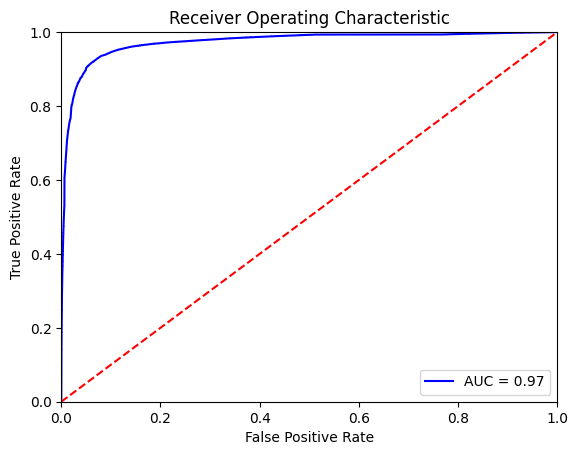

The log loss for the Naive bayes is: 0.2663865943835242


<ipython-input-35-ae1f0d567b1c>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(class_labels + [''],rotation=90)


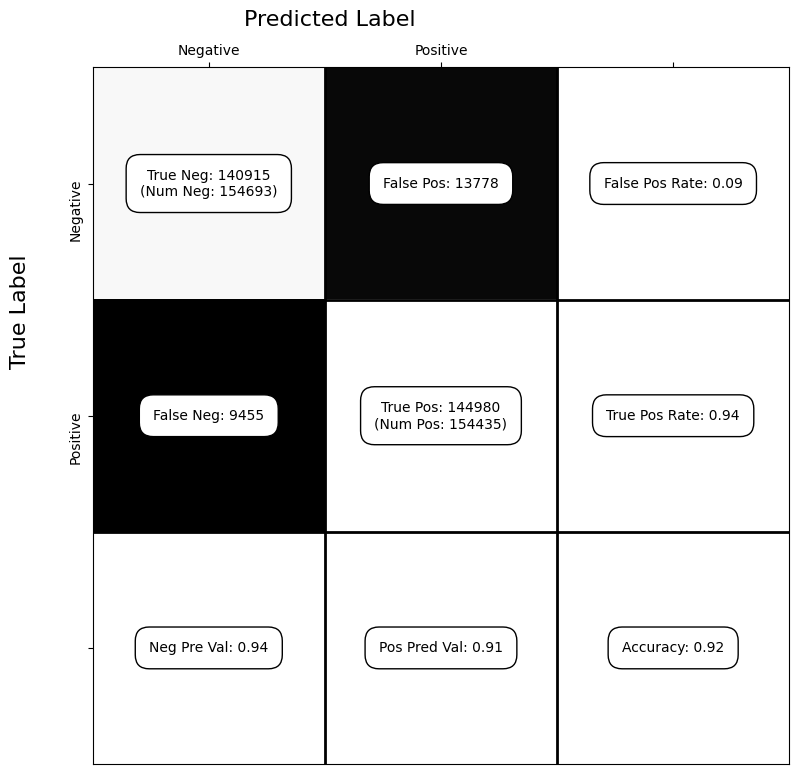

Precision : 91.32138222955693
Recall : 93.87768316767573
The accuracy is 92.48 %
------------ 2.0924198627471924 seconds ------------


In [ ]:
start_time = time.time()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)
#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)
tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))
print('------------ %s seconds ------------'%(time.time()-start_time))

**2. Logistic Regression:**

In [ ]:
#Logistic regression hyperparameter tuning
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
start_time = time.time()
best_params_logreg = []
parameters = {'loss' :['log'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
warnings.filterwarnings('ignore')
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_logreg.append(clf.best_params_)
print('Best parameters for Logistic Regression are:',best_params_logreg)
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for Logistic Regression are: [{'alpha': 0.1, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'}]
--- 296.7039270401001 seconds ---


Confusion matrix:
 [[136961  17732]
 [ 22939 131496]]


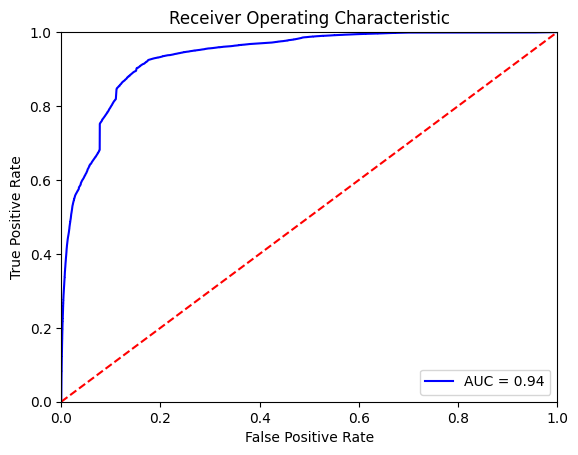

The log loss for the Logistic regression is: 0.5511837091576136


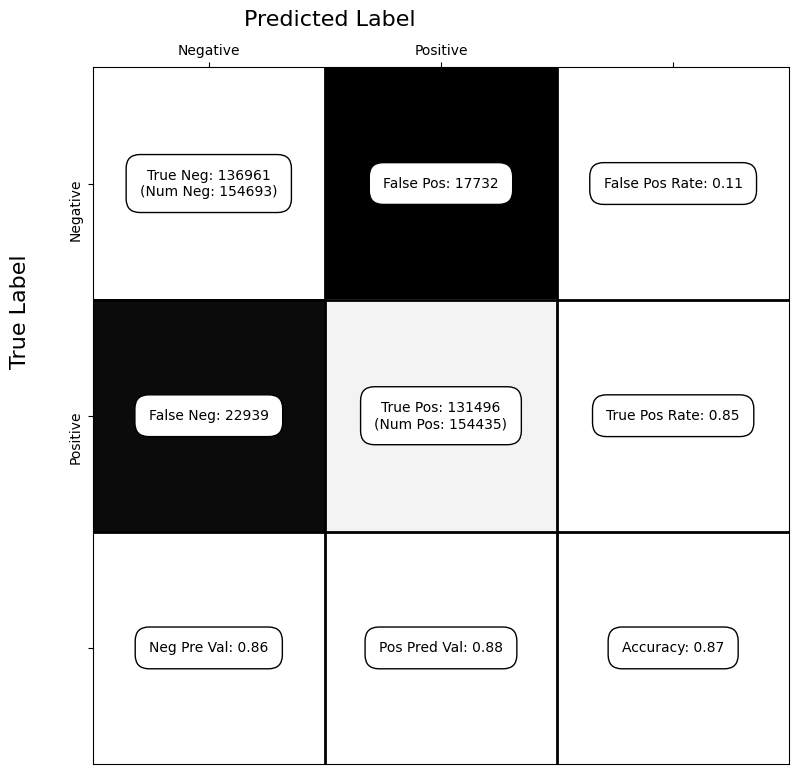

Precision : 88.11751145897553
Recall : 85.14650176449639
The accuracy is 86.84 %


In [ ]:
clf = SGDClassifier(loss = 'log',penalty = 'l2',alpha = 0.1, n_jobs = -1)
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_log_ref = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n",conf_log_ref)
#ROC for a given hyperparameters for logistic regression
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Logistic regression is:",a)
#print confusion matrix
show_confusion_matrix(conf_log_ref,['Negative','Positive'])

#Precision and recall
tn = conf_log_ref[0,0]; fp = conf_log_ref[0,1]; fn = conf_log_ref[1,0]; tp = conf_log_ref[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)
print("Precision :",precision)
print("Recall :",recall)

tp = conf_log_ref[0][0]
tn = conf_log_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

**3. Support Vector Machine:**

In [ ]:
#SVM hyperparameter tuning
start_time = time.time()
best_params_SVM = []
parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_SVM = clf.best_params_
print("Best hyperparameters for linear SVM:",best_params_SVM)
print('------{} seconds-------'.format(time.time()-start_time))

Best hyperparameters for linear SVM: {'alpha': 0.1, 'loss': 'hinge', 'n_jobs': -1, 'penalty': 'l2'}
------247.24474549293518 seconds-------


Confusion matrix:
 [[141090  13603]
 [ 26444 127991]]


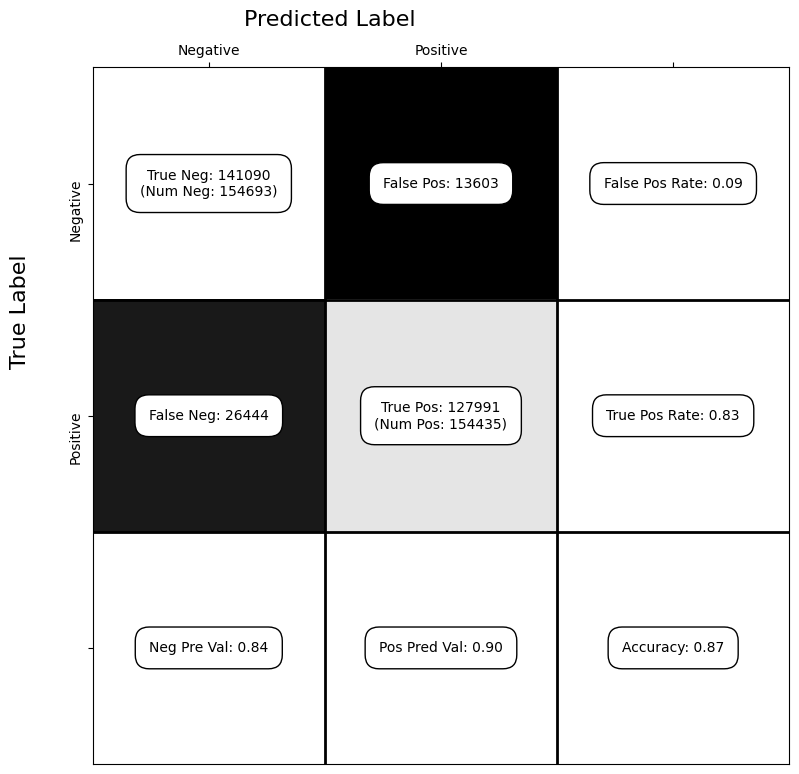

Precision : 90.39295450372191
Recall : 82.87693851782304
The accuracy is 87.05 %


In [ ]:
#Linear SVM
clf = SGDClassifier(penalty = 'l2', alpha = 0.1, n_jobs =  -1, loss = 'hinge')
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_SVM_ref = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",conf_SVM_ref)
#print confusion matrix
show_confusion_matrix(conf_SVM_ref,['Negative','Positive'])
#Precision and recall
tn = conf_SVM_ref[0,0]; fp = conf_SVM_ref[0,1]; fn = conf_SVM_ref[1,0]; tp = conf_SVM_ref[1,1];
precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)
print("Precision :",precision)
print("Recall :",recall)
tp = conf_SVM_ref[0][0]
tn = conf_SVM_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

**BOW Bi-gram :MultinomialNB**

In [ ]:
# Hyperparameter tuning for MultinomialNB with Bigrams
start_time = time.time()
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(ngram_range=(1,2),max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
print('-------- %s seconds -------'%(time.time()-start_time))

-------- 824.7739119529724 seconds -------


Confusion matrix:
 [[143243  11450]
 [ 10369 144066]]


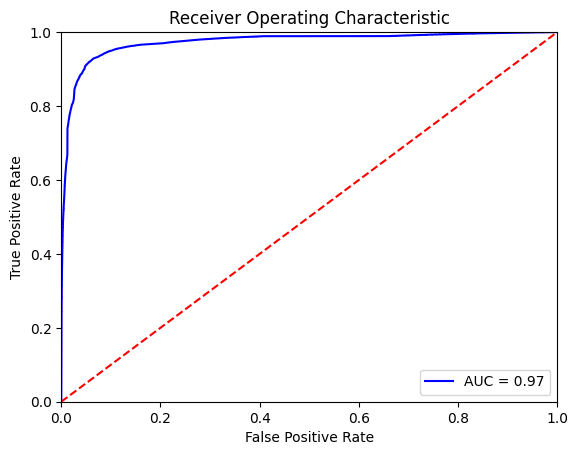

The log loss for the Naive bayes is: 0.3279700928655696


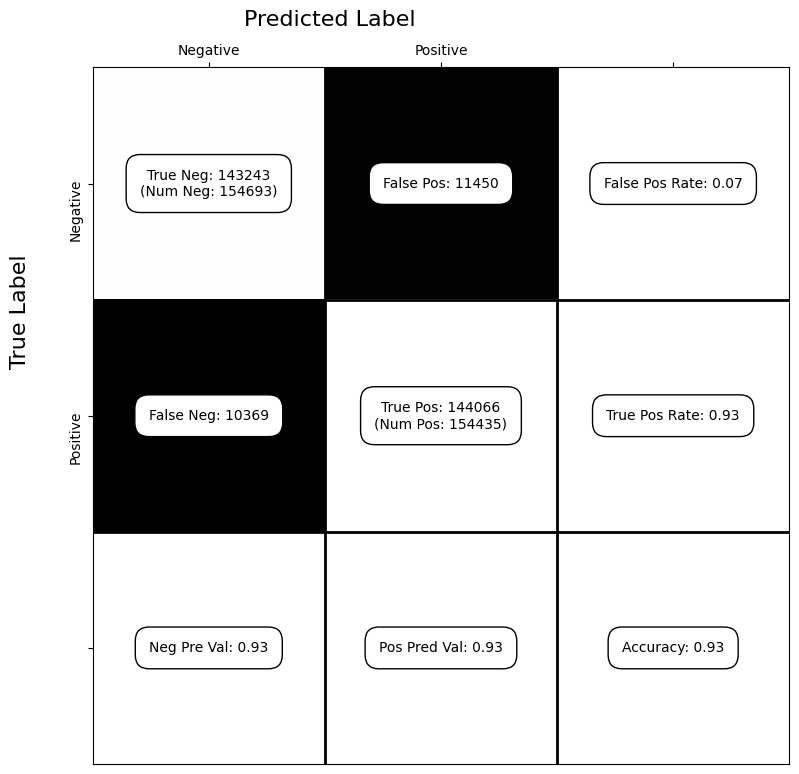

Precision : 92.63741351372207
Recall : 93.28584841519086
The accuracy is 92.94 %


In [ ]:
# MultinomialNb with Bigrams
score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])
#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)
tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

**TF-IDF: Multinomial Naive Bayes

In [ ]:
# Hyperparameter tuning for MultinomialNB with Bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
start_time = time.time()
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = TfidfVectorizer(max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
print('-------- %s seconds -------'%(time.time()-start_time))

-------- 541.4709167480469 seconds -------


Confusion matrix:
 [[140884  13809]
 [  9570 144865]]


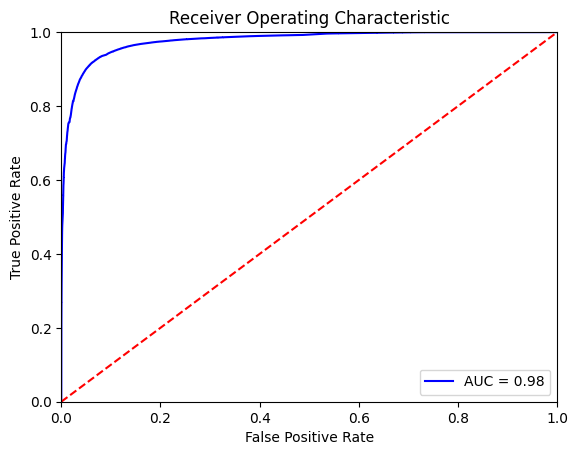

The log loss for the Naive bayes is: 0.205144275679825


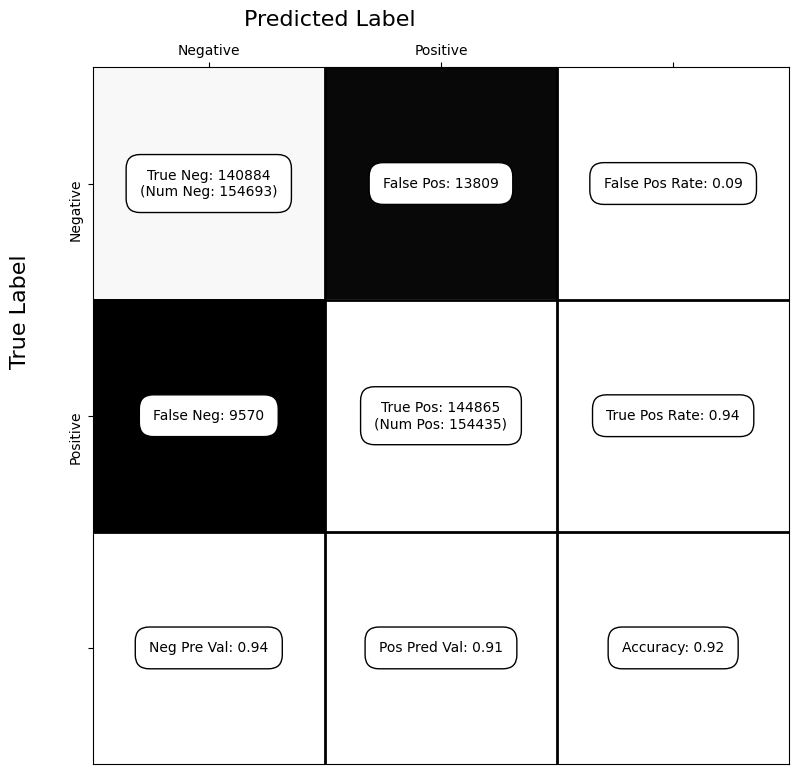

Precision : 91.29725096739226
Recall : 93.80321818240684
The accuracy is 92.44 %


In [ ]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)
#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)
#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)
print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

Conclusion :
1. Accuracy of different models:



BOW - unigram :
MultinomialNB : 92.48%
Logistic Regression: 86.98%

SVM : 87.51


BOW - bigram :
MultinomialNB : 92.94%
TF_IDF:MultinomialNB : 92.44%

Word2Vec:Logistic Regression : 78.52%

Among all the models Multinomial Naive Bayes with bigrams is giving the best accuracy with 92.94%
